In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,roc_auc_score,roc_curve,accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor

In [16]:
housing = pd.read_csv(r'C:\Users\dai\Desktop\Machine Learning\Datasets\Housing.csv')
X = housing.drop('price', axis=1)
y = housing['price']

In [22]:
cat = list(X.select_dtypes(include=object).columns)
cat

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [23]:
c_gbr = CatBoostRegressor(random_state=24, cat_features=cat)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size = 0.3, 
                                   random_state=24)

In [26]:
c_gbr.fit(X_train, y_train)
y_pred = c_gbr.predict(X_test)


Learning rate set to 0.035168
0:	learn: 26401.5780724	total: 1.87ms	remaining: 1.87s
1:	learn: 25978.7424047	total: 3.35ms	remaining: 1.67s
2:	learn: 25562.4776567	total: 4.82ms	remaining: 1.6s
3:	learn: 25174.5545802	total: 6.12ms	remaining: 1.52s
4:	learn: 24813.2769041	total: 7.44ms	remaining: 1.48s
5:	learn: 24409.3346585	total: 8.78ms	remaining: 1.46s
6:	learn: 24090.4271427	total: 10.2ms	remaining: 1.44s
7:	learn: 23769.0521312	total: 11.6ms	remaining: 1.44s
8:	learn: 23464.5364251	total: 13.1ms	remaining: 1.44s
9:	learn: 23124.8319264	total: 14.4ms	remaining: 1.43s
10:	learn: 22818.0762020	total: 15.9ms	remaining: 1.43s
11:	learn: 22531.3535513	total: 17.3ms	remaining: 1.43s
12:	learn: 22215.1129317	total: 18.9ms	remaining: 1.44s
13:	learn: 21915.4604994	total: 20.5ms	remaining: 1.44s
14:	learn: 21628.2409282	total: 22ms	remaining: 1.45s
15:	learn: 21380.1514422	total: 23.2ms	remaining: 1.43s
16:	learn: 21114.2843282	total: 24.5ms	remaining: 1.42s
17:	learn: 20887.1565683	total:

In [28]:
y_pred = c_gbr.predict(X_test)
print(("r2 score(svm):"), r2_score(y_test, y_pred))

r2 score(svm): 0.6146747368236991


In [38]:
params = {'learning_rate': np.linspace(0.001, 0.9, 10), 'max_depth': [None, 2, 3, 4], 'n_estimators': [25,50, 100]}
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
c_gbr = CatBoostRegressor (random_state=24, cat_features=cat)
gcv = GridSearchCV(c_gbr, param_grid=params, cv=kfold, n_jobs=-1)
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

0:	learn: 22957.2788738	total: 2.04ms	remaining: 49.1ms
1:	learn: 20571.7014201	total: 5.33ms	remaining: 61.3ms
2:	learn: 18991.0936338	total: 7.28ms	remaining: 53.4ms
3:	learn: 17935.5884377	total: 9.11ms	remaining: 47.8ms
4:	learn: 17223.2643907	total: 10.5ms	remaining: 42ms
5:	learn: 16706.5835631	total: 11.9ms	remaining: 37.6ms
6:	learn: 16250.3615955	total: 13.2ms	remaining: 34ms
7:	learn: 15879.4662517	total: 14.6ms	remaining: 31ms
8:	learn: 15430.5186150	total: 16ms	remaining: 28.4ms
9:	learn: 15207.4315182	total: 17.3ms	remaining: 26ms
10:	learn: 15062.4558875	total: 18.2ms	remaining: 23.1ms
11:	learn: 14839.3348923	total: 19ms	remaining: 20.6ms
12:	learn: 14821.2280668	total: 19.5ms	remaining: 18ms
13:	learn: 14653.6076359	total: 20.4ms	remaining: 16ms
14:	learn: 14512.0546123	total: 21.2ms	remaining: 14.2ms
15:	learn: 14413.2605760	total: 22.1ms	remaining: 12.4ms
16:	learn: 14352.8208852	total: 22.9ms	remaining: 10.8ms
17:	learn: 14259.5774198	total: 23.8ms	remaining: 9.27ms


In [40]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance': best_model.feature_importances_})

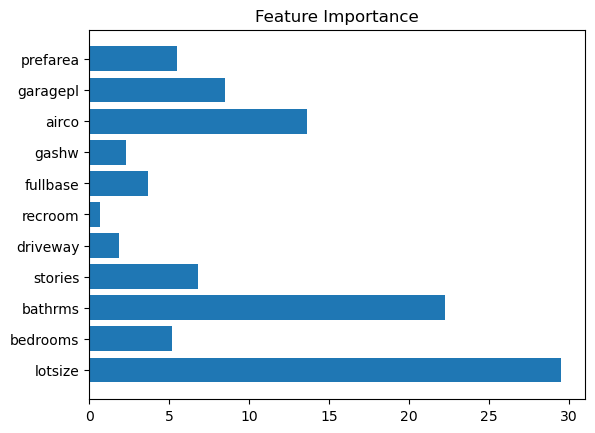

In [43]:
plt.barh(df_imp['Feature'],
        df_imp['Importance'])
plt.title("Feature Importance")
plt.show()